## Decision Trees

The pictorial representation of a decision tree as follows:


In [1]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/673/1*MCn6_qX_KYNwHaTSOqqbSA.png', width=600,height=600)

### Importing libraries in Python

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (2).csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading the dataset

In [4]:
import io
iris = pd.read_csv(io.BytesIO(uploaded['Iris.csv']) , index_col=0)


In [5]:
iris.shape

(150, 5)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.groupby('Species').sum()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,250.3,170.9,73.2,12.2
Iris-versicolor,296.8,138.5,213.0,66.3
Iris-virginica,329.4,148.7,277.6,101.3


In [10]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Data Visualizations


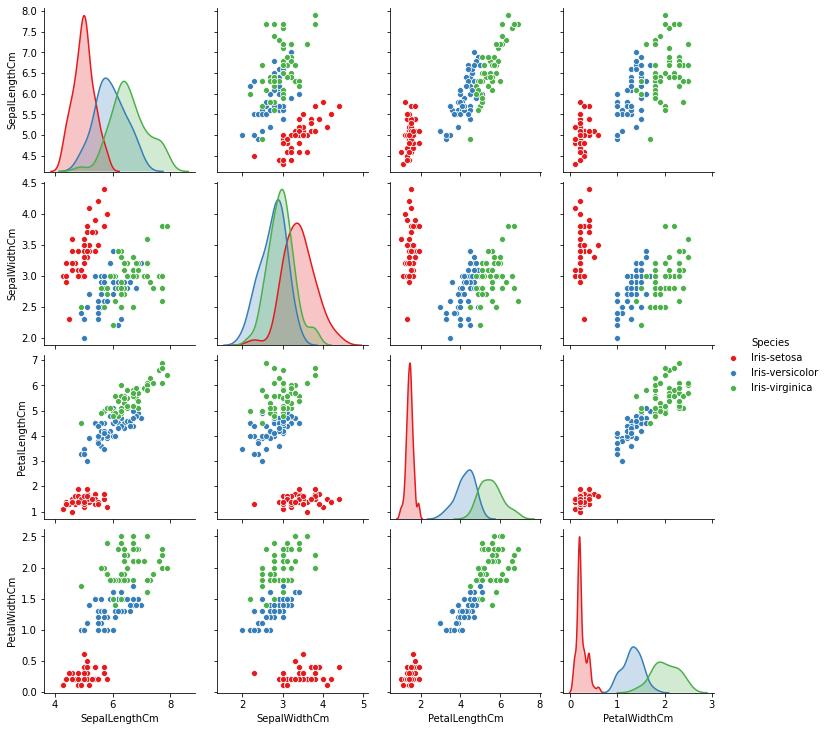

In [11]:
sns.pairplot(iris,hue='Species',palette='Set1')

SepalLengthCm       AxesSubplot(0.125,0.536818;0.352273x0.343182)
SepalWidthCm     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
PetalLengthCm          AxesSubplot(0.125,0.125;0.352273x0.343182)
PetalWidthCm        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

<Figure size 792x504 with 0 Axes>

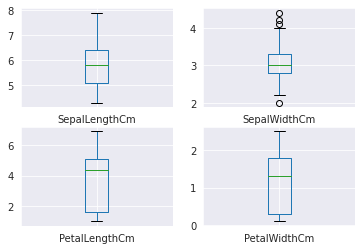

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(11,7))
iris.plot(kind='box',layout=(2,2),sharex=False,sharey=False,subplots=True)

<Figure size 360x360 with 0 Axes>

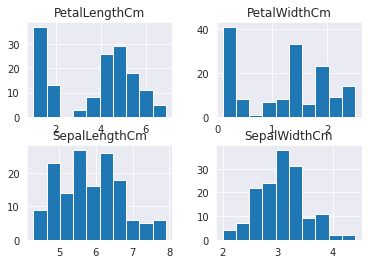

In [13]:
plt.figure(figsize=(5,5))
iris.hist()
plt.show()

### Train Test Split
Now its time to split our data into a training set and a testing set!
We will use sklearn to split your data into a training set and a testing set.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = iris.drop('Species',axis=1)
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Training a Decision Tree Model


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction and Evaluation
Let's evaluate our decision tree.

In [19]:
predictions = dtree.predict(X_test)

In [20]:
print(predictions)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']


In [21]:
from sklearn.metrics import classification_report,confusion_matrix  , accuracy_score

In [22]:
print("Classification Report : \n ",classification_report(y_test,predictions))

Classification Report : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50



In [23]:
print(accuracy_score(y_test,predictions))

0.94


In [24]:
print("Confusion Matrix : \n",confusion_matrix(y_test,predictions))

Confusion Matrix : 
 [[16  0  0]
 [ 0 14  1]
 [ 0  2 17]]


In [25]:
features = list(iris.columns[1:])
features

['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

### Let us visualize the Decision Tree to understand it better.
Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library.



In [26]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


Decision Tree 



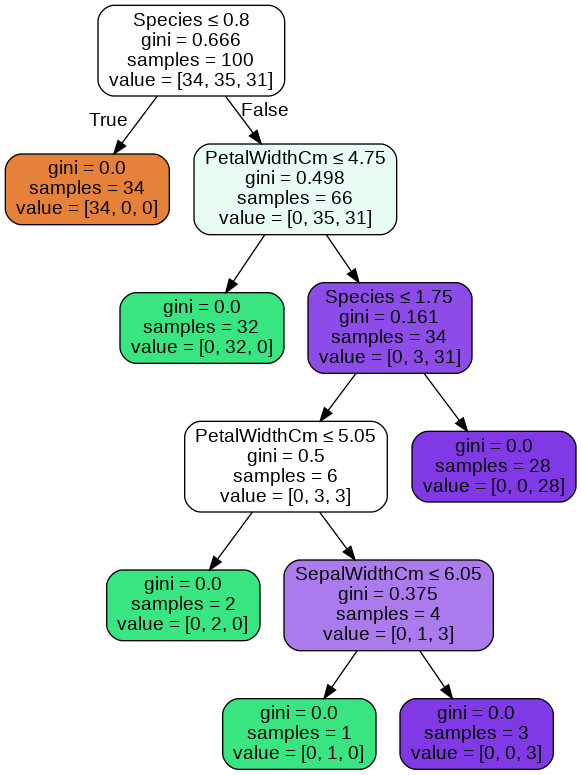

In [29]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import warnings
warnings.simplefilter("ignore")

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
print('Decision Tree \n') 
Image(graph.create_png())

**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**